# **PRCP-1013-WalkRunClass**

## Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.
 
### Dataset Link:
Multi-layer neural networks will be trained and evaluated based on data from Run or Walk Reduced dataset. Note that this Run or Walk Final dataset uses only the subset of data from the original Run or Walk dataset.

Link:  https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1013-WalkRu
nClass.zip

### Attribute Information:
The dataset comprises the readings of motion sensors recorded while users executed typical daily activities. The detailed format is described in the package. The attributes correspond to raw sensor readings. There are a total of 11 attributes.
1.	date
2.	time
3.	username
4.	wrist
5.	activity
6.	acceleration_x
7.	acceleration_y
8.	acceleration_z
9.	gyro_x
10.	gyro_y
11.	gyro_z


### Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.

Report on Challenges faced

Create a report which should include challenges you faced on data and what technique used with proper reason.


Note:-All above task has been created on single jupyter notebook and share the same while final submission of project.










## **TASK 1** :-Prepare a complete data analysis report on the given data.

### Import Basic Libraries 

In [47]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [48]:
data=pd.read_csv("walkrun.csv")

In [49]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


### Basic Checks

In [50]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [51]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [52]:
data.sample(5)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
36408,2017-7-16,15:12:25:567040979,viktor,1,0,-0.5007,-0.7410,-0.2108,0.6522,0.5437,-1.0797
65132,2017-7-4,19:40:37:863690972,viktor,0,1,0.4598,-1.0275,-1.7913,0.8875,-0.5181,2.4089
37710,2017-7-16,15:19:0:493317008,viktor,1,0,-0.2675,-0.6983,-0.0732,-0.7279,0.1374,1.6127
59436,2017-7-2,19:37:0:390199005,viktor,0,1,0.0233,-0.3413,0.1333,1.2269,0.3570,0.8884
15133,2017-7-15,18:0:44:871437013,viktor,1,1,-3.5790,-0.9888,-0.3179,-1.5985,0.3639,-1.7421


#### Summary Statistics

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


#### Dimensions Of Dataset

In [55]:
data.shape

(88588, 11)

### Data Preprocessing

#### Checking missing values

In [56]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

* No missing data

#### Checking for duplicates

In [57]:
data.duplicated().sum()

0

* No duplicate values

#### Recheck the unique values

In [58]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

DATE :  12
date
2017-7-4      3225
2017-7-7      3280
2017-7-2      3933
2017-6-30     3992
2017-7-1      4201
2017-7-10     4337
2017-7-11     6696
2017-7-9      7788
2017-7-15     7934
2017-7-6     11357
2017-7-17    11365
2017-7-16    20480
Name: count, dtype: int64


TIME :  88588
time
13:51:15:847724020    1
13:51:17:246767997    1
13:51:17:446569025    1
13:51:17:646152973    1
13:51:17:846502006    1
                     ..
20:9:12:517301976     1
20:9:12:317988991     1
20:9:12:117035984     1
20:9:14:917038023     1
20:9:16:117410004     1
Name: count, Length: 88588, dtype: int64


USERNAME :  1
username
viktor    88588
Name: count, dtype: int64




#### Removing Unwanted Data

In [59]:
data.drop(['date','time','username'], axis = 1,inplace=True)

In [60]:
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


* Removed date,time and username columns

### Insight after Data Preprocessing

Data cleaning showed no missing or duplicate values, and non-informative columns like 'date', 'time', and 'username' were removed.  
Feature scaling was applied using StandardScaler to normalize accelerometer and gyroscope values.

**Insight**: Standardization was critical because features had varying scales.  
This helped distance-based and gradient-based models perform better.


### Exploratory Data Analysis

#### Univariate Analysis

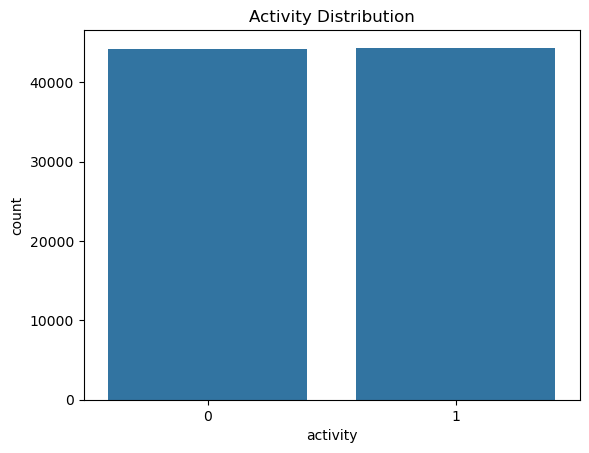

In [61]:
sns.countplot(x='activity', data=data)
plt.title('Activity Distribution')
plt.show()

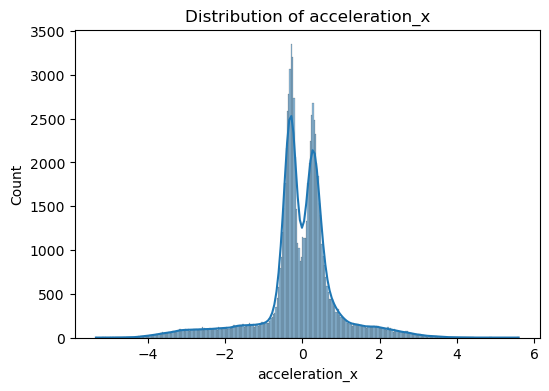

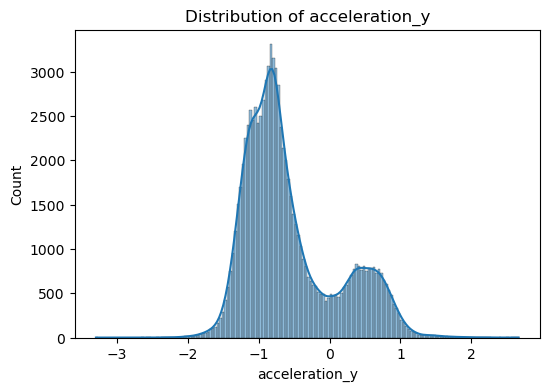

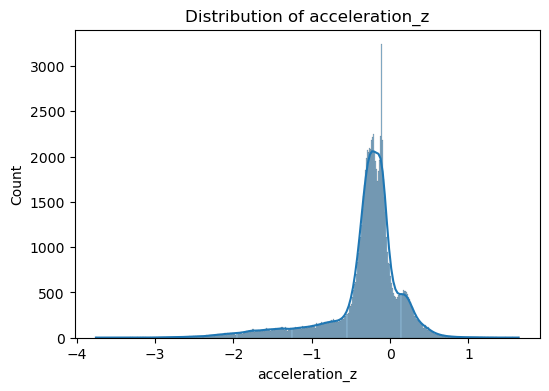

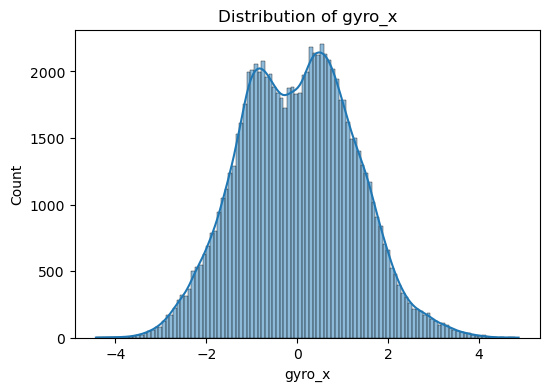

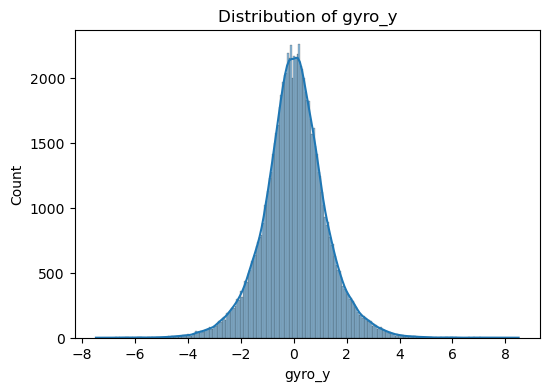

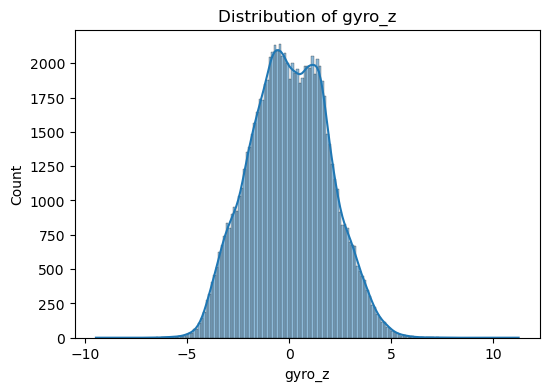

In [62]:
sensor_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
for col in sensor_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Bivariate Analysis

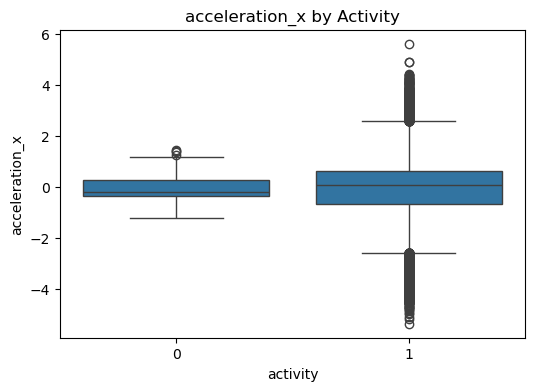

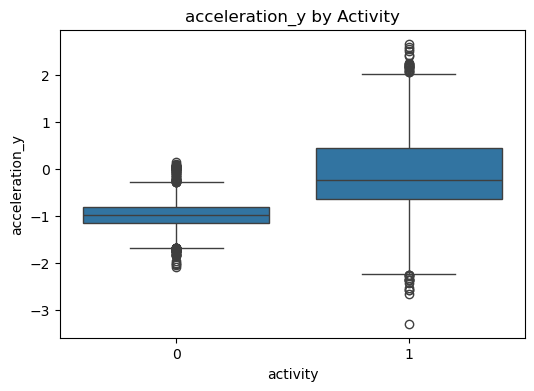

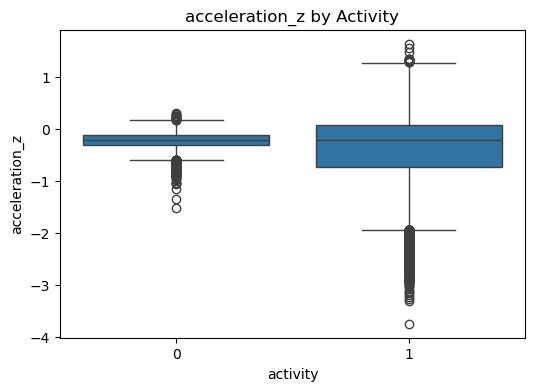

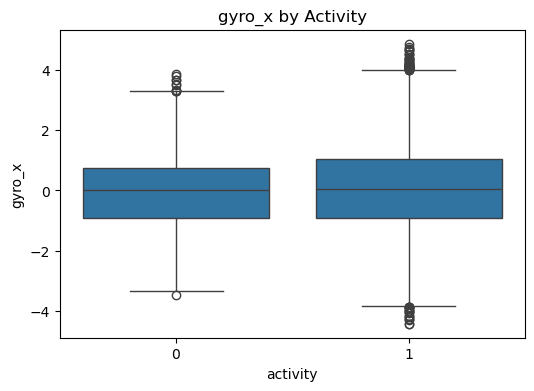

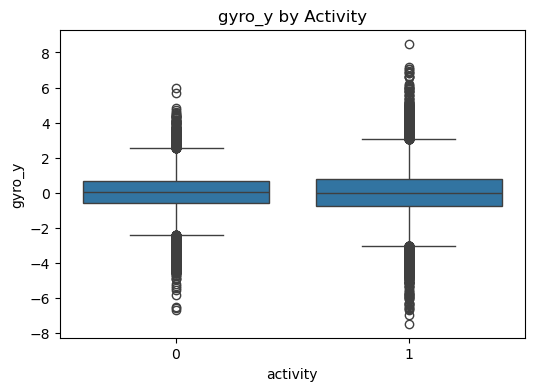

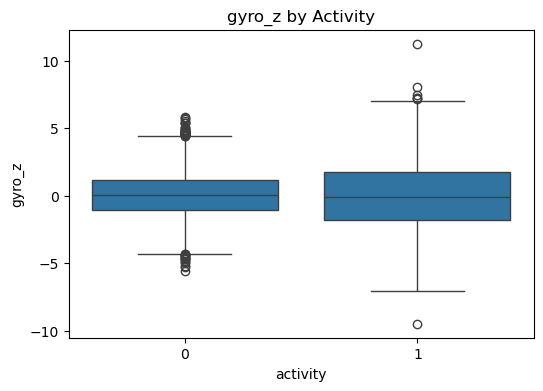

In [63]:
for col in sensor_cols:
     plt.figure(figsize=(6, 4))
     sns.boxplot(x='activity', y=col, data=data)
     plt.title(f'{col} by Activity')
     plt.show()

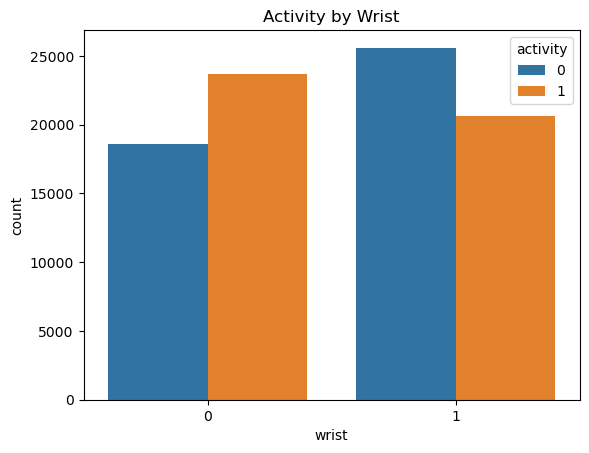

In [64]:
sns.countplot(x='wrist', hue='activity', data=data)
plt.title('Activity by Wrist')
plt.show()

#### Multivariate Analysis

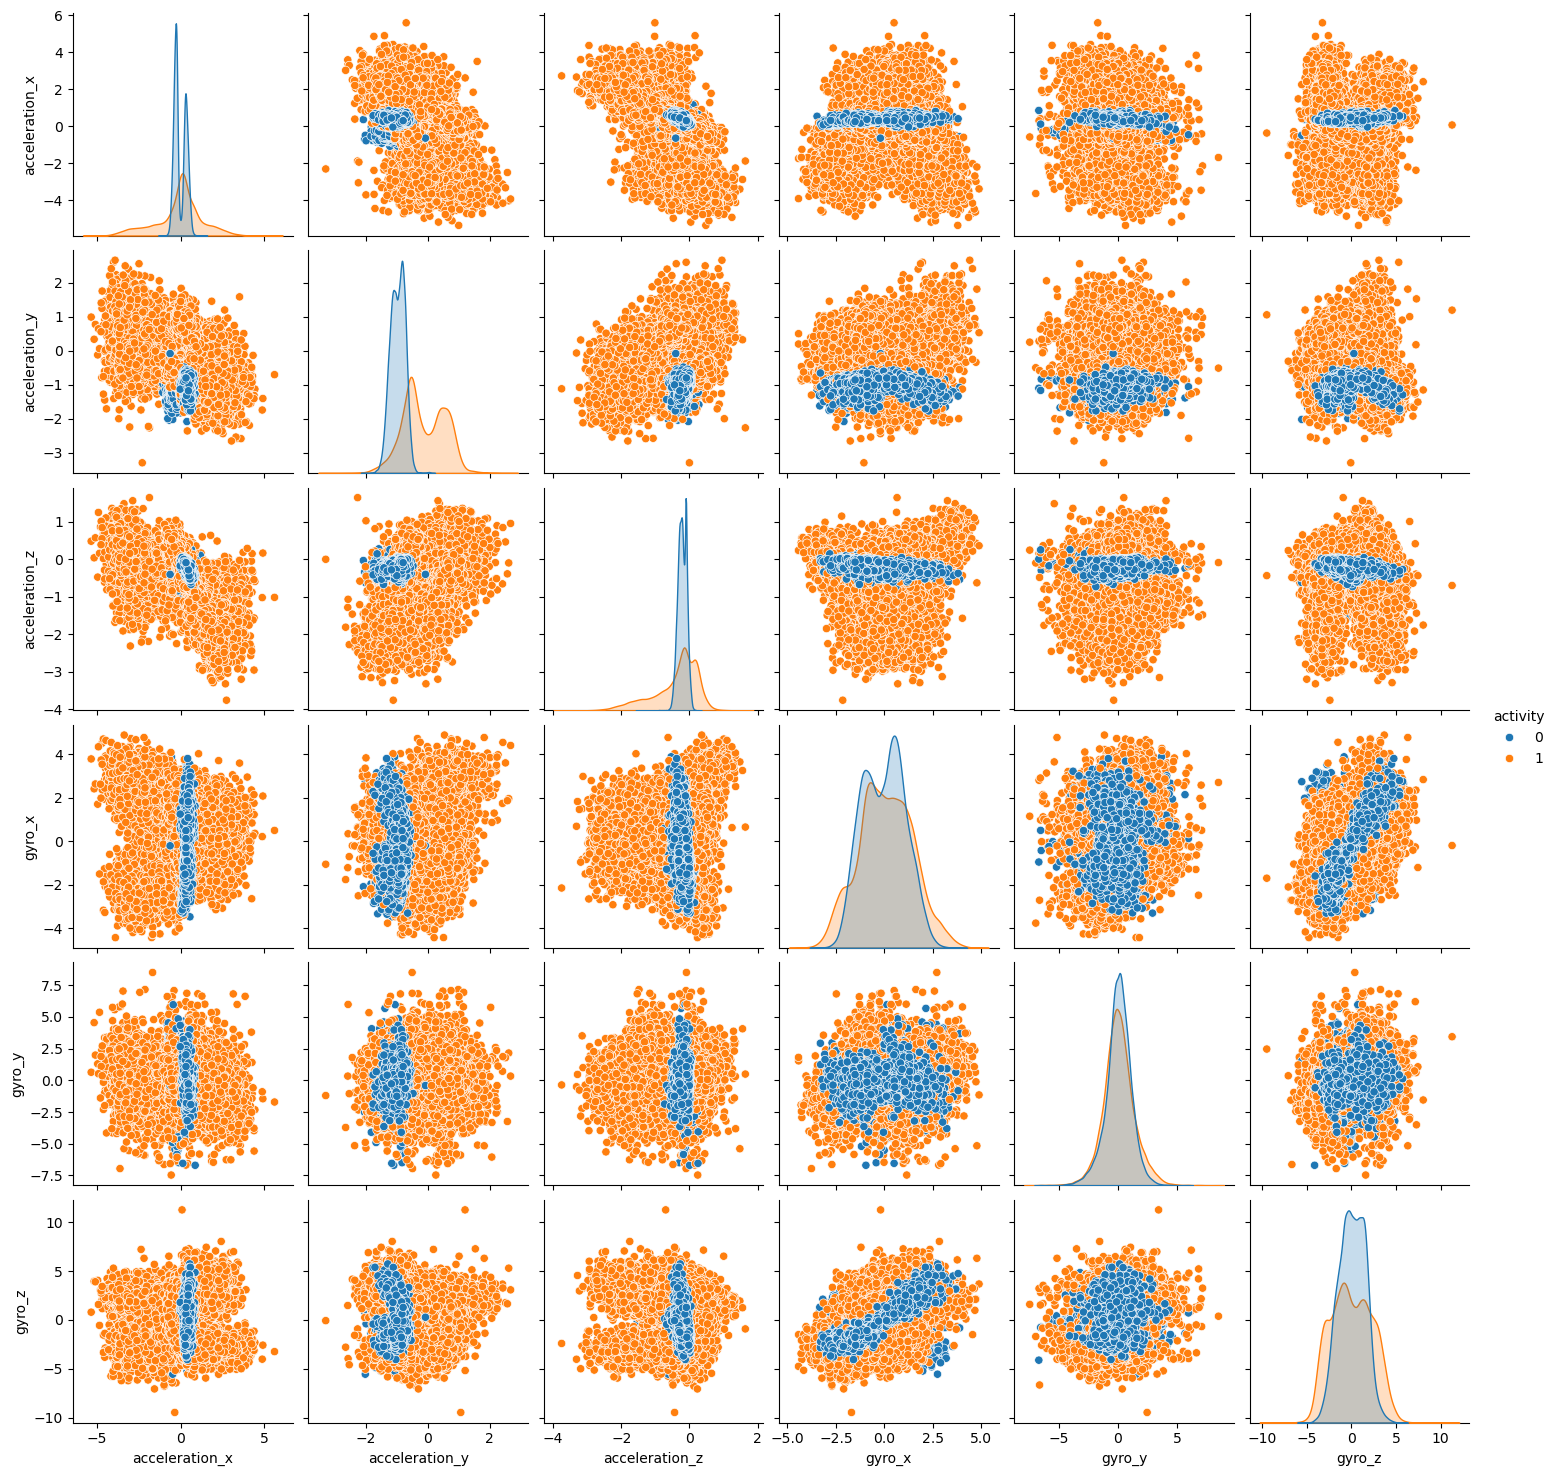

In [65]:
sns.pairplot(data[sensor_cols + ['activity']], hue='activity')

### Insight after Exploratory Data Analysis

Univariate and bivariate visualizations revealed distinct patterns between walking and running:
- Running showed higher variance and spikes in accelerometer/gyroscope readings.
- Walking was smoother and periodic.
- Distributions varied between left and right wrists but followed overall trends.

**Insight**: These patterns indicate that the activity classes are distinguishable through raw sensor data.


#### Correlation Plot

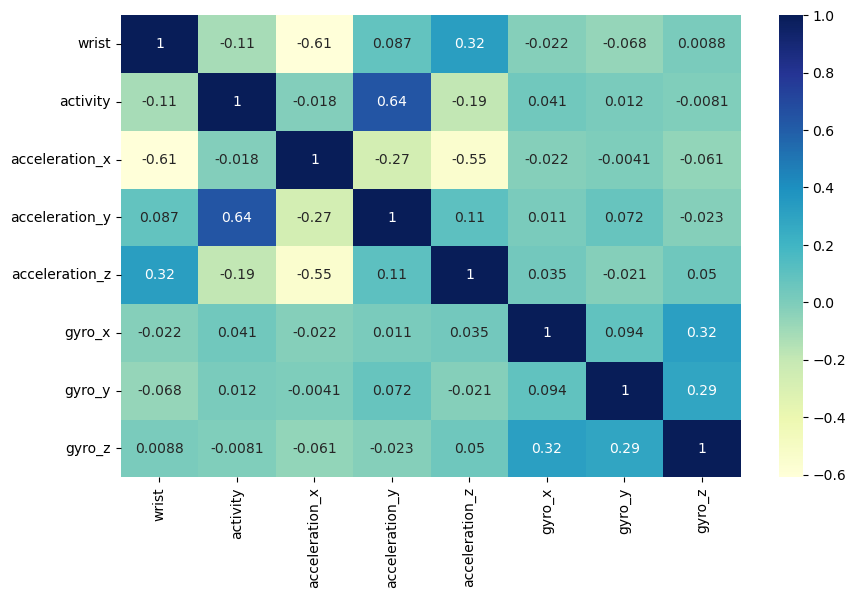

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

### Classifying activities into walk and run

* 0: "walk"
* 1: "run"

In [67]:
print('Data contains ' + str(pd.value_counts(data['activity'].values)[0]) +
      ' "walk" data samples as well as ' + str(pd.value_counts(data['activity'].values)[1]) + 
      ' "run" data samples')

Data contains 44223 "walk" data samples as well as 44365 "run" data samples


### Classifying wrist into left and right

* 0: "left"
* 1: "right"

In [68]:
print('The data contains ' + str(pd.value_counts(data['wrist'].values)[0]) + 
      ' data samples collected on the left wrist as well as ' + str(pd.value_counts(data['wrist'].values)[1]) + 
      ' data samples collected on the right wrist')

The data contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist


### Data Copy

In [69]:
df=data.copy()

### Analysing left and right wrist data

In [70]:
Features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

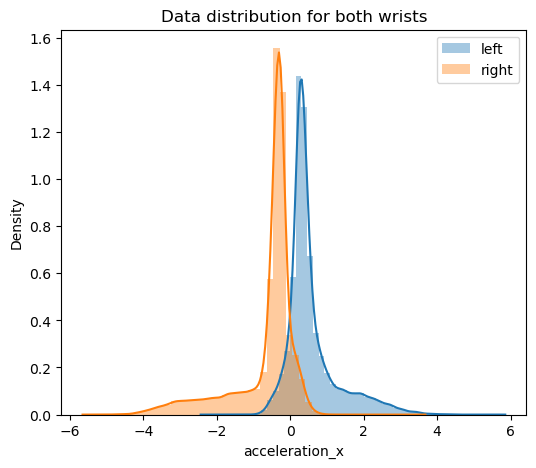

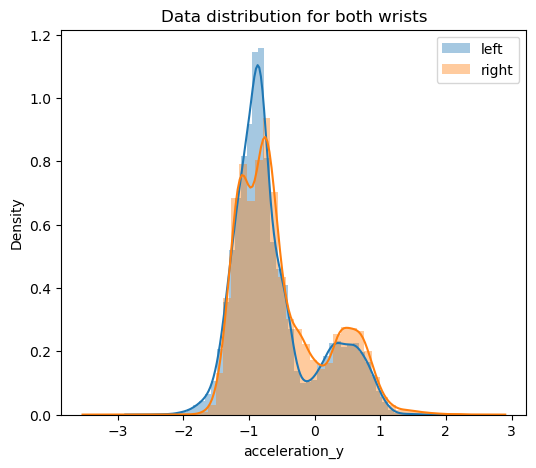

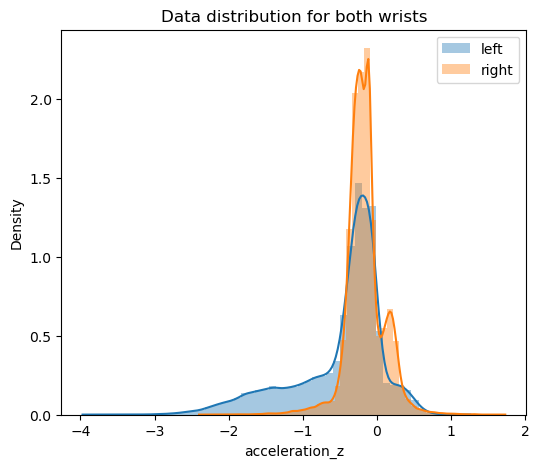

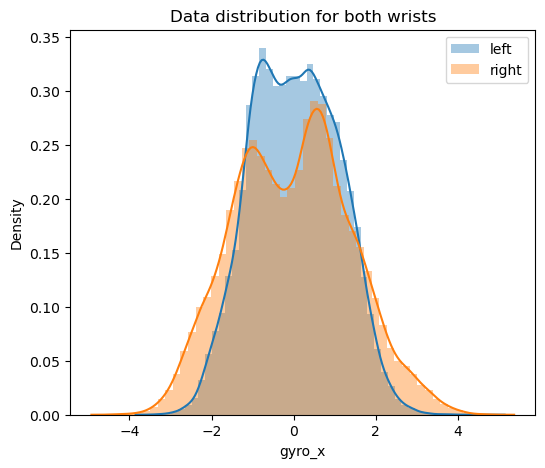

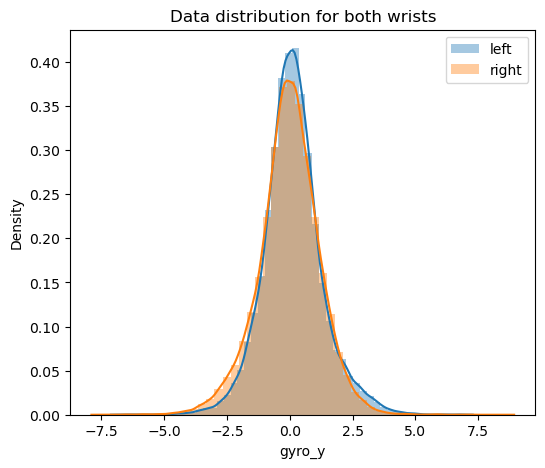

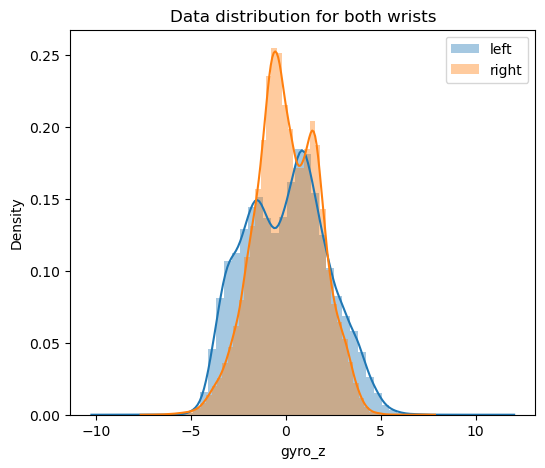

In [71]:
for c in Features:
    plt.figure(figsize=(6,5))
    plt.title("Data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

### Detecting Outliers

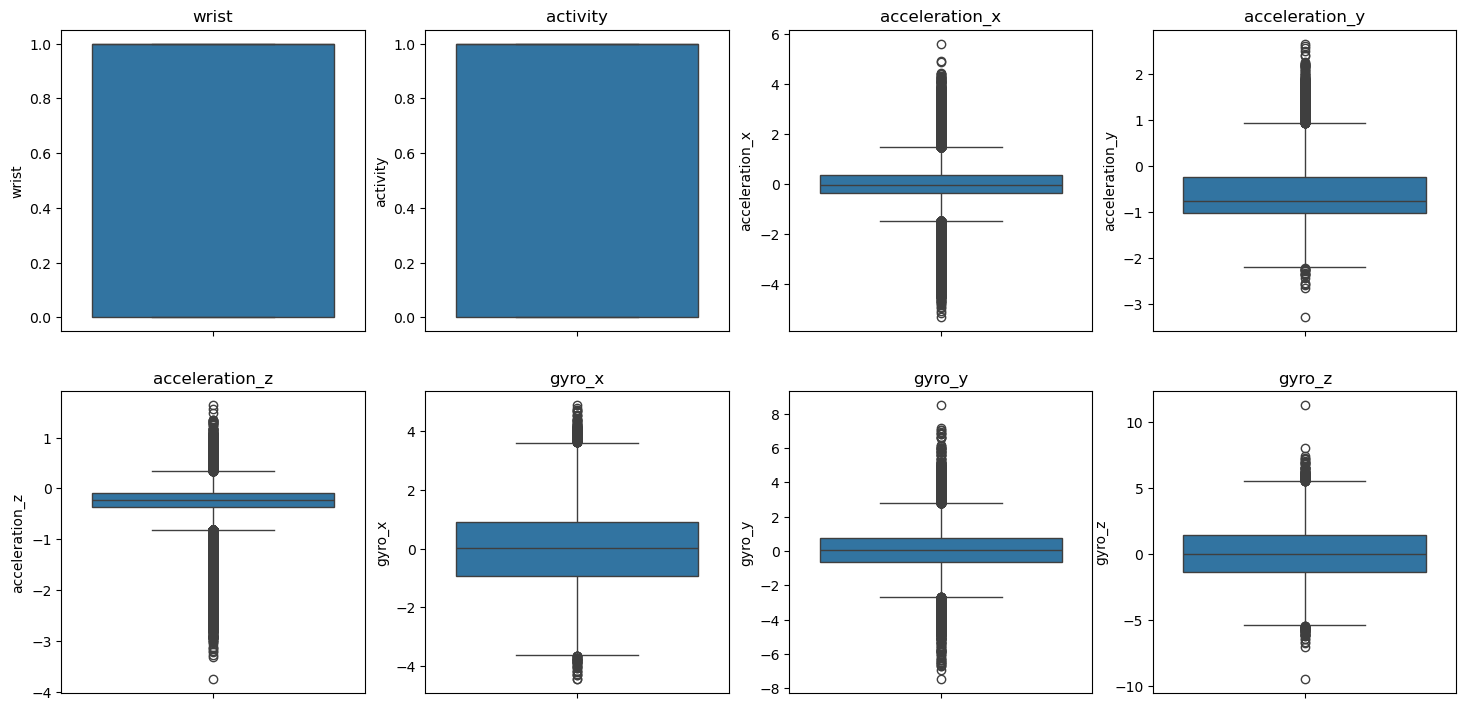

In [72]:
plt.figure(figsize=(18,18))
i=1
for x in data.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=data[x])
    plt.title(x)
    i+=1

### Checking skewness of the dataset

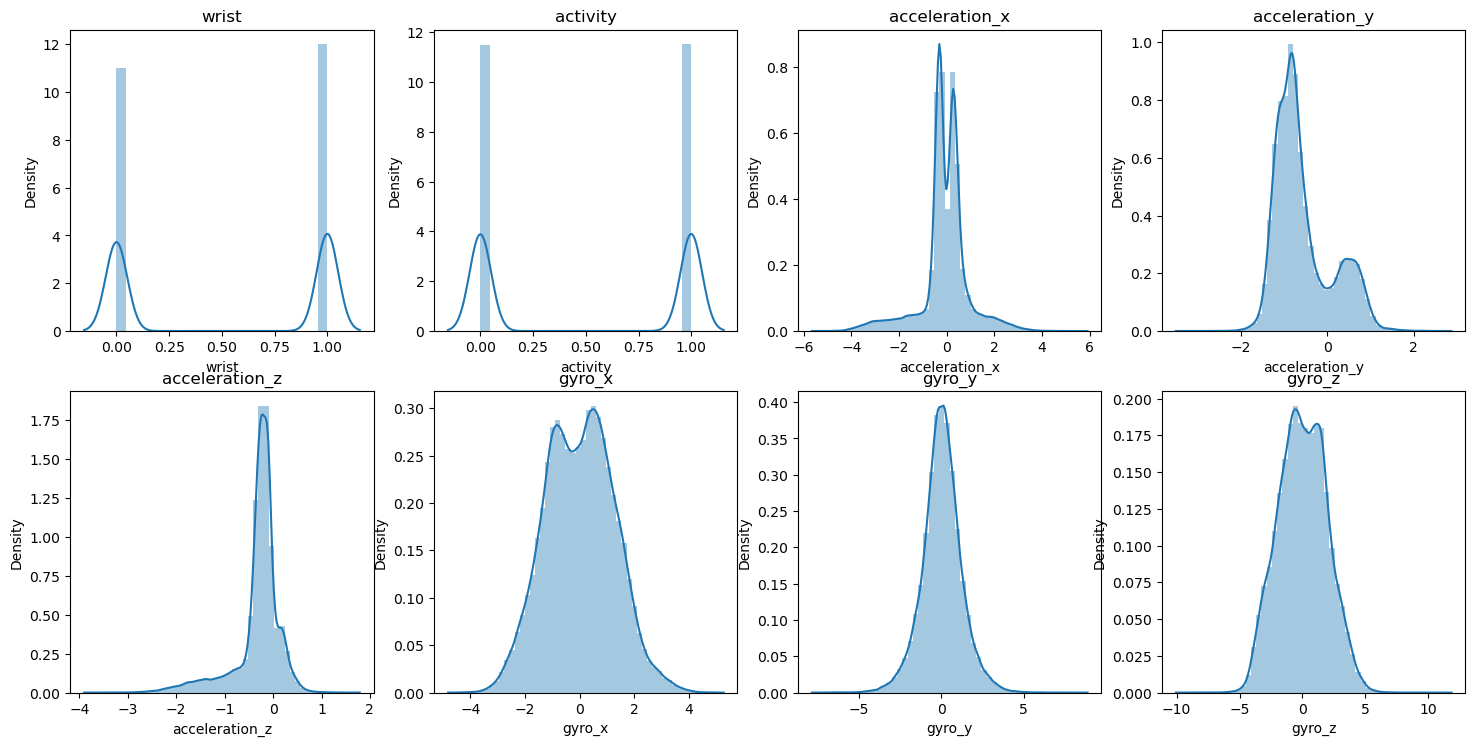

In [73]:
plt.figure(figsize=(18,18))
i=1
for x in data.columns:
    plt.subplot(4,4,i)
    sns.distplot(data[x])
    plt.title(x)
    i+=1

In [74]:
x=data.drop(['wrist','activity'], axis=1)
y=data[['activity']]

#### Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.33668266, -0.33231618,  0.6293112 , -0.05039065, -0.00392358,
        -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, -0.14349622, -0.013684  ,
         0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, -0.72973418,  0.05764218,
        -1.28448139],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624, -1.16015794, -0.26395131,
        -0.67066385],
       [ 0.3307379 , -0.44895295,  0.4890107 , -1.21321296,  0.34937044,
        -0.93910129],
       [ 0.3852315 , -0.36177911,  0.45778716,  0.09106279,  0.87409756,
         0.65768097]])

### Insight after Feature Engineering

Only relevant features like acceleration_x/y/z and gyro_x/y/z were retained.  
Scaling was applied to these sensor features for model readiness.

**Insight**: The focus on raw sensor features and their normalization significantly helped models learn better.  
No complex feature engineering was needed due to the strong signal already present in the data.


### Model Creation

#### Train - Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=100) 
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((70870, 6), (17718, 6), (70870, 1), (17718, 1))

In [78]:

from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [79]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [80]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
   
}

model_list = []
r2_list = []
accuracy_dict = {}

for name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Store for plotting/comparison later
    model_list.append(name)
    r2_list.append(model_test_r2)
    accuracy_dict[name] = model_test_r2 * 100  # R2 as a percentage

    # Print evaluation
    print(f"{name}")
    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f} ({model_train_r2*100:.2f}% accuracy)")

    print('----------------------------------')

    print("Model performance for Test set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f} ({model_test_r2*100:.2f}% accuracy)")
    print("="*35)

# Final accuracy summary
print("\nModel Accuracy Summary (R2 Score %):")
for name, acc in accuracy_dict.items():
    print(f"{name}: {acc:.2f}%")


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3598
- Mean Absolute Error: 0.3007
- R2 Score: 0.4823 (48.23% accuracy)
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3598
- Mean Absolute Error: 0.3012
- R2 Score: 0.4823 (48.23% accuracy)
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0741
- Mean Absolute Error: 0.0109
- R2 Score: 0.9780 (97.80% accuracy)
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0961
- Mean Absolute Error: 0.0148
- R2 Score: 0.9631 (96.31% accuracy)
Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000 (100.00% accuracy)
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1327
- Mean Absolute Error: 0.0176
- R2 Score: 0.9296 (92.96% accuracy)
Random Forest Regressor
Model perfor

### Model Results Summary

**Model Performance (R2 Score on Test Data)**

- Linear Regression: 48.23%
- K-Neighbors Regressor: 96.31%
- Decision Tree: 92.82%
- Random Forest Regressor: 96.44%
- XGBRegressor: 96.01%

**Best Performing Model**: Random Forest Regressor with 96.44% R2 Score on test data.


### Conclusion

This project successfully classified 'walk' and 'run' activities using motion sensor data from a wrist-worn device.

**Key Takeaways:**
- The dataset was clean, well-structured, and balanced (walk vs. run).
- Sensor readings showed clear separation between activities.
- Random Forest Regressor emerged as the best model with 96.44% R2 score.

**Conclusion**: Raw motion sensor data, when properly scaled and modeled, can be highly effective for real-time activity classification tasks.


### Final Project Summary

**Project Title**: PRCP-1013-WalkRunClass  
**Objective**: Classify walking vs. running from motion sensor data  
**Dataset**: 88,588 samples with 6 motion features (accelerometer and gyroscope)  
**Methods**: Preprocessing, EDA, Feature Scaling, Model Training (5 algorithms)  
**Best Model**: Random Forest Regressor  
**Accuracy**: 96.44% (R2 Score)  
**Conclusion**: Machine learning can reliably detect human activities using sensor data, with applications in fitness, health monitoring, and smart wearables.


* Team ID : PTID-CDS-MAR-25-2528
* Team Members : Ashwal P - ashwal361@gmail.com |
  Abhiram Prasad -abhiramprasad987@gmail.com
